# CSE 152A Winter 2021 – Assignment 2


## Instructor: Ben Ochoa
- Assignment Published On: **Wed, Jan 27, 2021**

- Due On: **Wed, Feb 10, 2021 11:59 PM (Pacific Time)**

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/21788).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

In [1]:
# Setup
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

## Filtering [17 pts]

### Part-1: Implementing Convolution [10 pts]

In this problem, you will implement the convolution filtering operation in NumPy.

As shown in the lecture, a convolution can be considered as a sliding window that computes a sum of the pixel values weighted by the flipped kernel. Your version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute a weighted sum of the neighborhood at each pixel.

First you will want to implement the **zero_pad** function [2 pts].

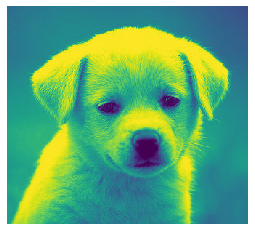

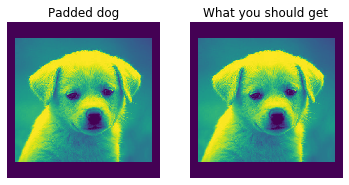

In [2]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """

    H, W = image.shape
    out = np.zeros((H + pad_top + pad_down, W + pad_left + pad_right))

    ### YOUR CODE HERE
    out[pad_top:H+pad_top, pad_left:W + pad_left] = image
    ### END YOUR CODE

    return out

# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
#solution_img = imread('padded_dog.jpg', mode='F')
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Now implement the function **`conv`**, **using at most 2 loops**. This function should take an image $f$ and a kernel $h$ as inputs and output the convolved image $(f*h)$ that has the same shape as the input image (use zero padding to accomplish this). Depending on the computer, your implementation should take around a second or less to run.

[6 pts]

took 0.904339 seconds.


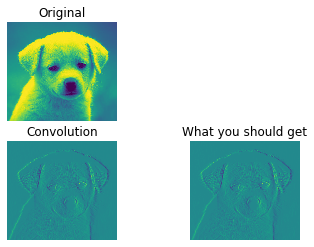

In [3]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))

    ### YOUR CODE HERE
    if Hk % 2 == 0:
        kernel = zero_pad(kernel, 1, 0, 0, 0)
    if Wk % 2 == 0:
        kernel = zero_pad(kernel, 0, 0, 1, 0)
    Hk, Wk = kernel.shape

    H_pad = int((Hk-1)/2)
    W_pad = int((Wk-1)/2)
    padded_img = zero_pad(image, H_pad, H_pad, W_pad, W_pad)
    flipped_kernel = np.flip(kernel)
    
    for i in range(Hi):
        for j in range(Wi):
            out[i,j] = np.sum(padded_img[i:i+Hk,j:j+Wk] * flipped_kernel)
    ### END YOUR CODE

    return out

# Simple convolution kernel.
# Feel free to change the kernel and to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Now let's filter some images! Here, you will apply the convolution function that you just implemented in order to bring about some interesting image effects. More specifically, we will use convolution to blur and sharpen our images.

First we will apply convolution for image blurring. To accomplish this, convolve the dog image with a 7x7 Gaussian filter for $\sigma = 1.0$. You can use the included function to obtain the Gaussian kernel.

[1 pt]

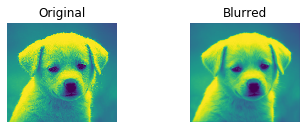

In [4]:
def gaussian2d(filter_size=7, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    Source: https://stackoverflow.com/a/43346070
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    blurred_img = np.zeros_like(img)
    
    ### YOUR CODE HERE
    gaussian_filter = gaussian2d(7, 1.0)
    blurred_img = conv(img, gaussian_filter)
    
    return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img))
plt.title('Blurred')
plt.axis('off')

plt.show()

Next, we will use convolution to sharpen the images. Convolve the image with the following filter to produce a sharpened result. For convenience, we have defined the filter for you:

[1 pt]

In [5]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

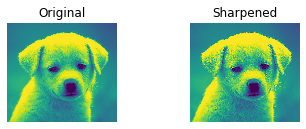

In [6]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    sharpened_img = np.zeros_like(img)
    
    ### YOUR CODE HERE
    sharpened_img = conv(img, sharpening_kernel)
    
    return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0)
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0)
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Part-2: Convolution Theory 1 [4 pts]

Consider (1) smoothing an image with a 3x3 box filter and then computing the derivative in the y-direction using the kernel.  Also consider (2) computing the derivative first, then smoothing. What is a single convolution kernel that will simultaneously implement both (1) and (2)? Try to give a brief justification for how you arrived at the kernel.
 
Use the y-derivative filter $[-1/2, 0, 1/2]^T$ (defined in [lecture 6](https://cseweb.ucsd.edu/classes/wi21/cse152A-a/lec6.pdf)) for this problem.

### Your answer to Part-2:

Assume we are performing convolution in full mode. In case (1), we have image $*$ box filter $*$ y-derivative filter. In case (2), we have image $*$ y-derivative filter $*$ box filter. Because convolution is both commutative and associative, image $*$ box filter $*$ y-derivative filter = image $*$ y-derivative filter $*$ box filter = image $*$ (box filter $*$ y-derivative filter). So box filter $*$ y-derivative filter will be the kernel that simultaneously implements both (1) and (2). And note that y-derivative filter already in multiplication-ready form, so we use the flipped version when performing the convolution.

$1/9 \cdot \begin{bmatrix} 1 & 1 & 1\\ 1 & 1 & 1\\ 1 & 1 & 1\end{bmatrix} * [1/2, 0, -1/2]^T = \begin{bmatrix} 1/18 & 1/18 & 1/18\\ 1/18 & 1/18 & 1/18\\ 0 & 0 & 0\\-1/18 & -1/18 & -1/18\\-1/18 & -1/18 & -1/18\end{bmatrix}$

### Part-3: Convolution Theory 2 [3 pts]

Certain 2D filters can be expressed as a convolution of two 1D filters. Such filters are called separable filters. Give an example of a 3x3 separable filter and compare the number of arithmetic operations it takes to
convolve an n × n image using that filter before and after separation. Count both, the number of multiplication and addition operations in each case.

Assume that the convolution of the image and filter is performed in "valid" mode, i.e., the image is not padded before convolution.

### Your answer to Part-3:

The 3x3 box filter is a good example of a 3x3 separable filter: $1/9 \cdot \begin{bmatrix} 1 & 1 & 1\\ 1 & 1 & 1\\ 1 & 1 & 1\end{bmatrix}$

This filter can be separated into two 1D filters perform convolution in valid mode: $1/3\cdot[1,1,1]^T * 1/3\cdot[1,1,1]$

In the case of the 3x3 separable filter, the number of multiplication is $9(n-2)^2$ because the operation will go through $(n-2)^2$ pixels and each pixel has 3x3 = 9 multiplications. And the number of addition is $8(n-2)^2$ because 9 multiplications needs 8 additions to add them up for each pixel.

In the case of the two 1D filters, the number of multiplication is $3n(n-2)+3(n-2)^2=6(n-1)(n-2)$ because in the first convolution, the operation will go through $n(n-2)$ pixels and each pixel has 3 multiplications. In the second convolution, the new image resulted from the first the convolution is in size of $(n-2)$ by $n$ and thus the operation will go through $(n-2)^2$ pixels. Each pixel has 3 multiplications. And the number of addition is $2n(n-2)+2(n-2)(n-2)=4(n-1)(n-2)$ because each pixel has 2 additions for the 3 multiplications with the total number of pixels operated being equal.

## Template Matching [5 pts]

Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CSE 152A (or are learning right now) that convolution can be used for template matching: a template g is multiplied with regions of a larger image f to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that our solution is not biased toward higher-intensity (white) regions.

The template of a product (template.jpg) and the image of the shelf (shelf.jpg) is provided. We will use convolution to find the product in the shelf.

<img src="template.jpg" alt="template" width="25px"/>
<img src="shelf.jpg" alt="shelf" width="600px"/>

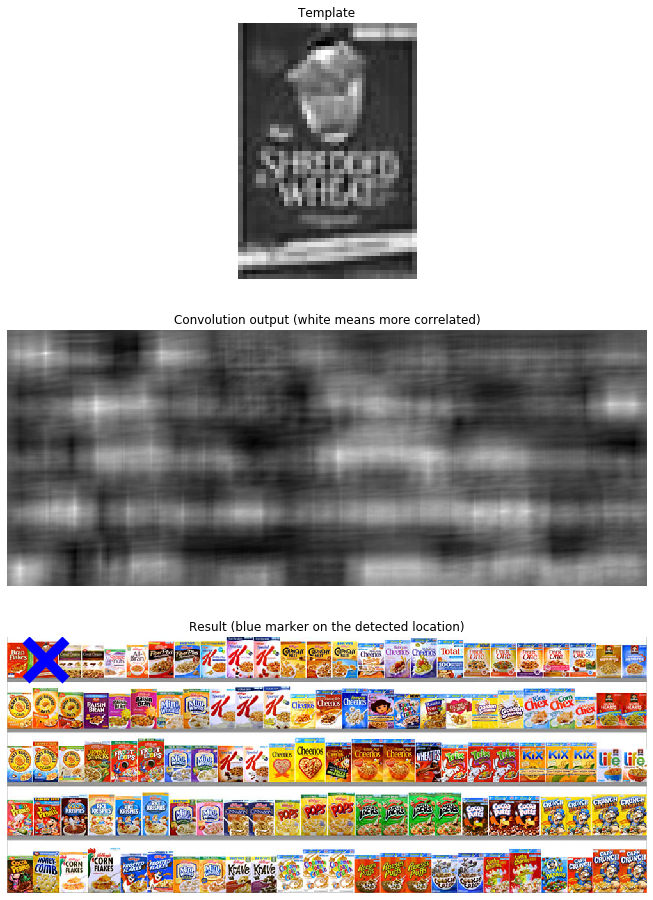

In [7]:
# Load template and image in grayscale
img = io.imread('shelf.jpg')
img_gray = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_gray = io.imread('template.jpg', as_gray=True)

# Perform a convolution between the image and the template and store 
# the result in the out variable
out = np.zeros_like(img_gray)

### YOUR CODE HERE
mean = np.sum(img_gray) / img_gray.size
out = conv(img_gray - mean, np.flip(temp_gray - mean))
### END YOUR CODE


# Find the location with maximum similarity
y, x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

## Problem 3: Edge Detection [8 pts]

In this problem, you will write a function to perform edge detection. The following steps need to be implemented.

- **Smoothing [2 pt]:** First, we need to smooth the images to prevent noise from being considered edges. For this problem, use a 9x9 Gaussian kernel filter with $\sigma = 1.4$ to smooth the images.

- **Gradient Computation [3+3 pts]:** After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$  and gradient direction as $tan^{-1}(G_y/G_x)$.

Compute the images after each step. Show each of the intermediate steps and label your images accordingly.

In total, there should be four output images (original, smoothed, gradient magnitude, gradient direction).

**For this question, use the image `geisel.jpeg`.**

Original:


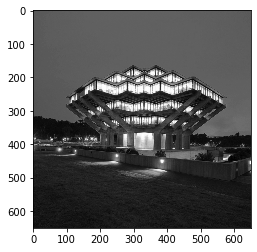

Smoothed:


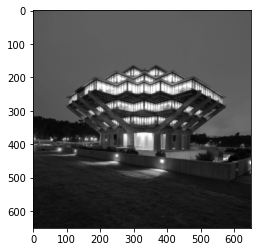

Gradient magnitude:


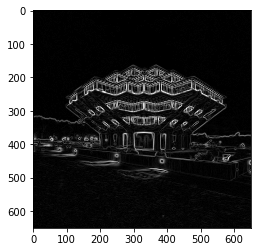

Gradient direction:


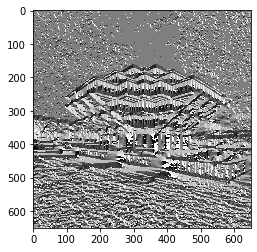

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage import convolve

def smooth(image):
    smooth_image = np.zeros_like(image)
    
    ### YOUR CODE HERE
    kernel = gaussian2d(9, 1.4)
    smooth_image = convolve(image, kernel, mode='mirror')
    ### END YOUR CODE
    
    return smooth_image

def gradient(image):

    g_mag = np.zeros_like(image)
    g_theta = np.zeros_like(image)
    
    ### YOUR CODE HERE
    image = image.astype(np.float64)
    dx_filter = np.array([[1/2,0,-1/2]])
    dy_filter = np.array([[1/2,0,-1/2]]).T
    g_x = convolve(image, dx_filter, mode='mirror')
    g_y = convolve(image, dy_filter, mode='mirror')
    g_mag = np.sqrt(np.square(g_x) + np.square(g_y))
    g_theta = np.arctan2(g_y,g_x)
    ### END YOUR CODE
     
    
    return g_mag, g_theta

def edge_detect(image):
    """Perform edge detection on the image."""
    smoothed = smooth(image)
    g_mag, g_theta = gradient(smoothed)
    return smoothed, g_mag, g_theta

# Load image in grayscale
image = io.imread('geisel.jpeg', as_gray=True)
smoothed, g_mag, g_theta = edge_detect(image)

print('Original:')
plt.imshow(image, cmap='gray')
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap='gray')
plt.show()

print('Gradient magnitude:')
plt.imshow(g_mag, cmap='gray')
plt.show()

print('Gradient direction:')
plt.imshow(g_theta, cmap='gray')
plt.show()

## Corner Detection [15 pts]

Next, you will implement a corner detector to detect photo-identifiable features in the image.

This should be done according to https://cseweb.ucsd.edu/classes/wi21/cse152A-a/lec6.pdf. You should fill in the function <code>corner_detect</code> with inputs <code>image, nCorners, smoothSTD, windowSize</code>, where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for Gaussian smoothing, corner detection, and non-maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that; instead return the nCorners strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Your function should also return the matrix of minimum eigen values that you computed.

For each image, detect 100 corners with a Gaussian standard deviation of 2.0 and a window size of 13. Display the corners using the show_corners_result function and plot the minimum eigen value images using the show_eigen_images function.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage import convolve

In [10]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [11]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for Gaussian smoothing kernel, corner detector, and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).
        The minor eigen value image having the same shape as the image
    """
    

    corners = np.zeros((nCorners, 2))
    minor_eig_image = np.zeros_like(image)

    ### YOUR CODE
    gaussian_filter = gaussian2d(windowSize, smoothSTD)
    smooth_image = convolve(image, gaussian_filter, mode='mirror')
    
    dx_filter = np.array([[1/2,0,-1/2]])
    dy_filter = np.array([[1/2,0,-1/2]]).T
    g_x = convolve(smooth_image, dx_filter, mode='mirror')
    g_y = convolve(smooth_image, dy_filter, mode='mirror')
    
    pad_size = int((windowSize - 1) / 2)
    padded_g_x = np.pad(g_x, (pad_size,pad_size), mode='reflect')
    padded_g_y = np.pad(g_y, (pad_size,pad_size), mode='reflect')
    
    H, W = image.shape
    for i in range(H):
        for j in range(W):
            window_g_x = padded_g_x[i:i+windowSize,j:j+windowSize]
            window_g_y = padded_g_y[i:i+windowSize,j:j+windowSize]
            
            spatial_grad_mat = np.zeros((2,2))
            spatial_grad_mat[0,0] = np.sum(np.square(window_g_x))
            spatial_grad_mat[1,1] = np.sum(np.square(window_g_y))
            spatial_grad_mat[0,1] = np.sum(window_g_x * window_g_y)
            spatial_grad_mat[1,0] = np.sum(window_g_x * window_g_y)
            
            minor_eig_image[i,j] = 1/2 * (np.trace(spatial_grad_mat) - 
                                    np.sqrt(np.square(np.trace(spatial_grad_mat)) 
                                            - 4 * np.linalg.det(spatial_grad_mat)))
            
    padded_minor_eig_image = np.pad(minor_eig_image, (pad_size,pad_size), mode='reflect')
    max_image = np.zeros_like(minor_eig_image)
    for i in range(H):
        for j in range(W):
            max_image[i,j] = np.max(padded_minor_eig_image[i:i+windowSize,j:j+windowSize])
            
    corner_image = np.zeros_like(minor_eig_image)
    for i in range(H):
        for j in range(W):
            corner_image[i,j] = max_image[i,j] if minor_eig_image[i,j] == max_image[i,j] else 0
    
    all_corners = []
    for i in range(H):
        for j in range(W):
            if corner_image[i,j] != 0:
                all_corners.append((corner_image[i,j], [j,i]))
    all_corners.sort(reverse=True)
    
    for i in range(nCorners):
        corners[i] = all_corners[i][1]
    
    return corners, minor_eig_image

In [12]:
def show_eigen_images(imgs):
    print("Minor Eigen value images")
    fig = plt.figure(figsize=(16, 16))
    # Plot image 1
    plt.subplot(1,2,1)
    plt.imshow(imgs[0], cmap='gray')
    plt.title('almond 1')

    # Plot image 2
    plt.subplot(1,2,2)
    plt.imshow(imgs[1], cmap='gray')
    plt.title('almond 2')
    
    plt.show()
    
def show_corners_result(imgs, corners):
    print("Detected Corners")
    fig = plt.figure(figsize=(16, 16))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

In [13]:
# detect corners on the two provided images
# adjust your corner detection parameters here
nCorners = 100
smoothSTD = 2
windowSize = 13

# read images and detect corners on images
imgs = []
eig_imgs = []
corners = []
for i in range(2):
    img = io.imread('almond' + str(i) + '.jpg')
    imgs.append(rgb2gray(img))
    corners_vals, minor_eig_image = corner_detect(imgs[-1], nCorners, smoothSTD, windowSize)
    eig_imgs.append(minor_eig_image)
    corners.append(corners_vals)

Minor Eigen value images


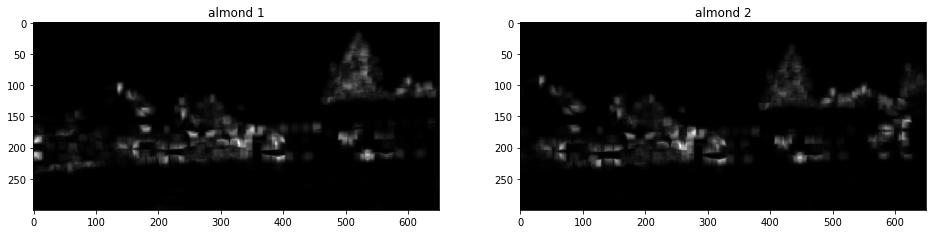

Detected Corners


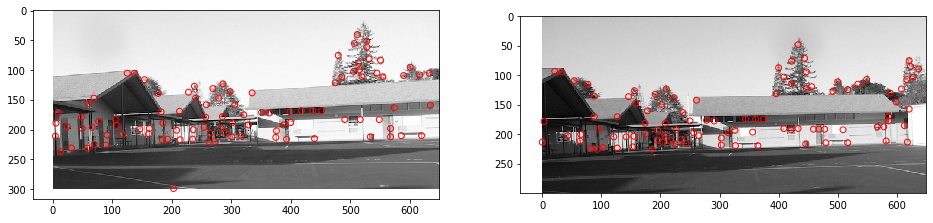

In [14]:
show_eigen_images(eig_imgs)
show_corners_result(imgs, corners)

## Gaussian Pyramid vs Scale-Space Representation [5+5 pts]

In this problem, you will compare the results obtained by generatig a Gaussian pyramid for an image against those obtained by generating its scale-space representation.

For the Gaussian pyramid, use a binomial kernel of size 5x5 as an approximation for the Gaussian filter. For the scale-space representation, use a Gaussian filter where the standard deviation and the size of the filter depend on the corresponding level of the pyramid. Look at the lecture slides: https://cseweb.ucsd.edu/classes/wi21/cse152A-a/lec7.pdf to see the correspondence between pyramid levels and standard deviation for the Gaussian filter in scale space. Also, remember the Gaussian filter dimension is $\lceil 6 \sigma \rceil$ for standard deviation $\sigma$.  If the result is an even number, then add 1 to make it odd. You only need to construct the pyramid and scale space representation from level 0 to level 6. Note that level 0 is just the original image in both the representations.

Use the provided plotting function to visualize the results.

In [15]:
def gaussian_pyramid(img):
    """Construct the gaussian pyramid for the input image.
       Return the pyramid as a list consisting of the images
       in the pyramid. The first element of the list is the 
       original image itself.
    """
    
    pyramid = []
    pyramid.append(img.copy()) # level-0 image

    
    ### YOUR CODE HERE
    binomial_kernel = np.array([[1,4,6,4,1]])
    gaussian_filter = np.outer(1/16 * binomial_kernel.T, 1/16 * binomial_kernel)
    for n in range(6):
        img = convolve(img, gaussian_filter, mode='mirror')
        H, W = img.shape
        H_new, W_new = int(H/2), int(W/2)
        new_img = np.zeros((H_new, W_new))
        for i in range(H_new):
            for j in range(W_new):
                new_img[i,j] = img[2*i,2*j]
        pyramid.append(new_img)
        img = new_img
    ### END YOUR CODE
    
    return pyramid

In [16]:
def scale_space(img):
    """Construct the scale space representation for the input image.
       Return the representation as a list consisting of the images
       in the scale space. The first element of the list is the 
       original image itself.
    """
    
    scale_space_rep = []
    scale_space_rep.append(img.copy()) # std = 0 image
    
    ### YOUR CODE HERE
    for n in range(6):
        sd = 2**(n)
        gaussian_filter = gaussian2d(6*sd+1, sd)
        new_img = convolve(img, gaussian_filter, mode='mirror')
        scale_space_rep.append(new_img)
    ### END YOUR CODE
    
    return scale_space_rep   

In [17]:
def plot_results(pyramid, scale_space_rep):        
    
    print("\tGaussian Pyramid\t\t\t Scale Space Representation")
    
    N = len(pyramid)
    std_list = [0] + [2**i for i in range(N-1)]
    for i in range(N):
        pyramid_img = pyramid[i]
        scale_space_img = scale_space_rep[i]
        
        fig = plt.figure(figsize=(12, 9))
        
        ax1 = fig.add_subplot(221)
        ax1.imshow(pyramid_img)
        r, c = pyramid_img.shape
        ax1.set_aspect((3*c)/(4*r))
        ax1.axis('off')
        plt.title("Level {}".format(i))
        
        
        ax2 = fig.add_subplot(222)
        ax2.imshow(scale_space_img)
        ax2.axis('off')
        plt.title("Standard Deviation = {}".format(std_list[i]))
        
        plt.show()

In [18]:
# read image
img = rgb2gray(io.imread("scene2.jpg"))

pyramid = gaussian_pyramid(img)
scale_space_rep = scale_space(img)

	Gaussian Pyramid			 Scale Space Representation


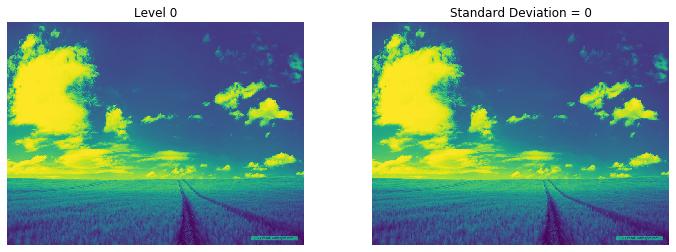

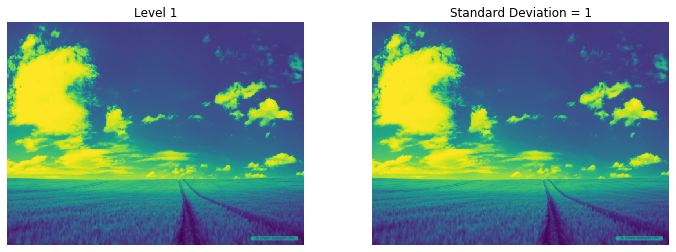

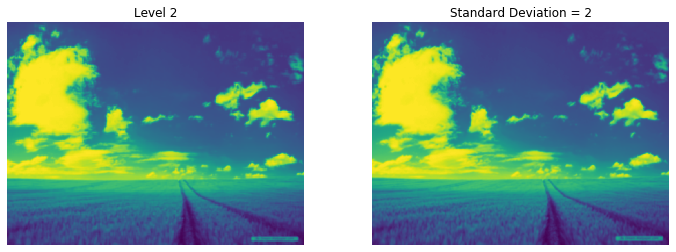

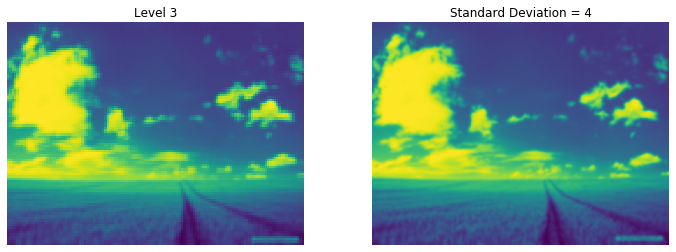

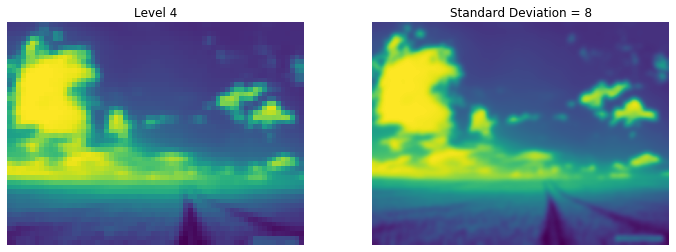

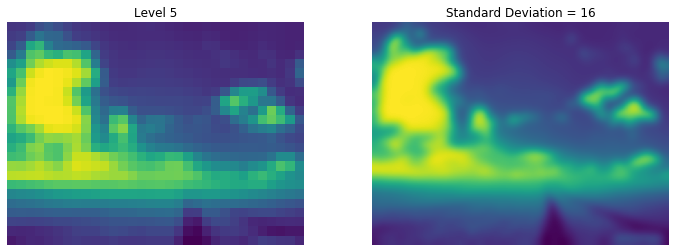

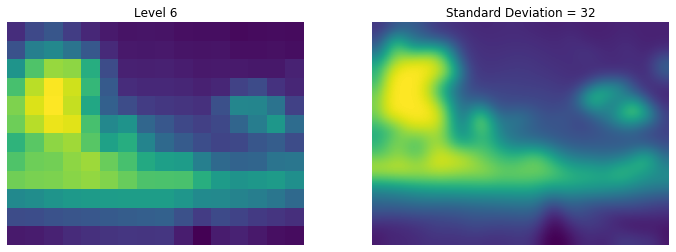

In [19]:
plot_results(pyramid, scale_space_rep)

---
## Submission Instructions
Remember to submit a PDF version of this notebook to Gradescope. Please make sure the contents of each cell are clearly shown in your final PDF file. **If they are not, we may dock points.**

There are multiple options for converting the notebook to PDF:
1. You can export using LaTeX (File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX).
2. You can first export as HTML and then save it as a PDF.